In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("/content/taxi_trip_pricing.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [ ]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
null_values=df.isnull().sum()
null_values

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [ ]:
# Identify categorical and numerical columns
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Fill missing values
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)  # Fill numerical with median

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)  # Fill categorical with mode

<ipython-input-5-ee51baa7fcf1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)  # Fill numerical with median
<ipython-input-5-ee51baa7fcf1>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']
label_encoder=LabelEncoder()
for column in categorical_columns:
  df[column]=label_encoder.fit_transform(df[column])
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,2,0,3.0,1,0,3.56,0.80,0.32,53.82,36.2624
1,47.59,0,0,1.0,0,0,3.52,0.62,0.43,40.57,50.0745
2,36.87,1,1,1.0,0,0,2.70,1.21,0.15,37.27,52.9032
3,30.33,1,0,4.0,1,0,3.48,0.51,0.15,116.81,36.4698
4,25.83,1,0,3.0,0,0,2.93,0.63,0.32,22.64,15.6180


In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
# Outlier Handling using IQR
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), median_value)

In [ ]:
df.describe()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25.112000,1.048000,0.295000,2.453000,1.189000,0.339000,3.503840,1.232650,0.292770,62.105210,51.433564
std,13.871956,1.036712,0.456271,1.079331,0.719581,0.580013,0.848115,0.418932,0.112664,31.339464,22.289384
min,1.230000,0.000000,0.000000,1.000000,0.000000,0.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.107500,0.000000,0.000000,2.000000,1.000000,0.000000,2.770000,0.870000,0.197500,37.107500,34.578850
50%,25.830000,1.000000,0.000000,2.000000,1.000000,0.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,36.727500,2.000000,1.000000,3.000000,2.000000,1.000000,4.202500,1.580000,0.382500,87.775000,64.813875
max,49.990000,3.000000,1.000000,4.000000,2.000000,2.000000,5.000000,2.000000,0.500000,119.840000,116.420600


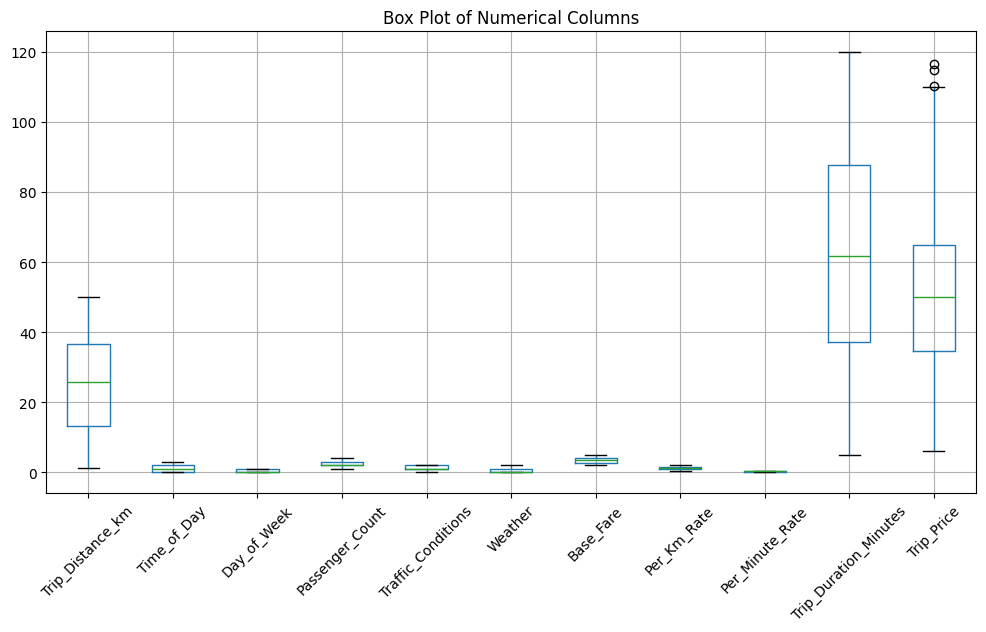

In [ ]:
# Data visualization: Boxplot after outlier handling
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<Axes: xlabel='Trip_Distance_km', ylabel='Trip_Price'>

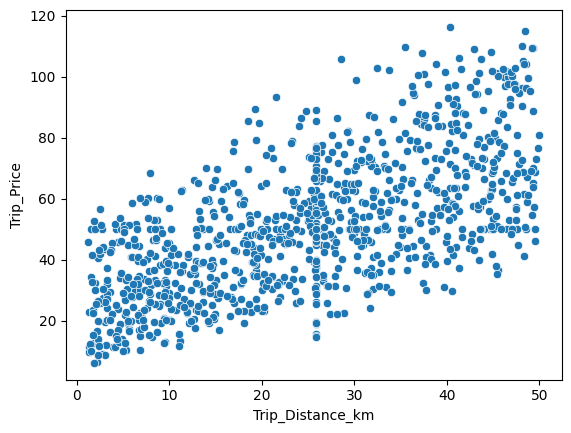

In [ ]:
sns.scatterplot(x='Trip_Distance_km',y='Trip_Price',data=df)


In [ ]:
correlation = df['Trip_Distance_km'].corr(df['Trip_Price'])
print("Correlation Coefficient:", correlation)


Correlation Coefficient: 0.653573973967699


In [ ]:
X = df[['Trip_Distance_km']]
y = df['Trip_Price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse

284.5085447829987

In [ ]:
np.sqrt(mse)

16.86738108844994

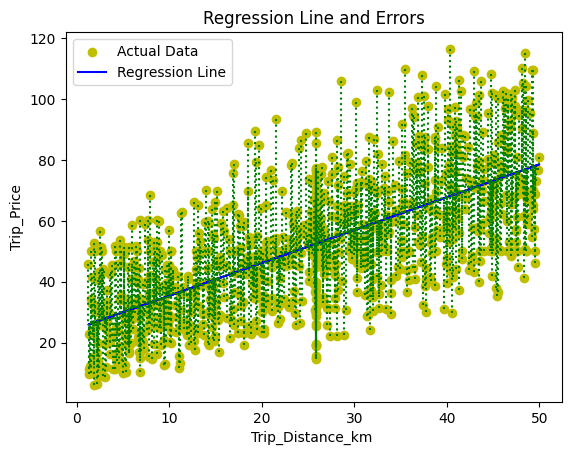

In [ ]:
# Scatterplot of actual data
plt.scatter(X, y, color='y', label='Actual Data')

# Plot the regression line
plt.plot(X, model.predict(X), color='blue', label='Regression Line')

# Plot errors (residuals)
for i in range(len(X)):
    plt.plot([X.iloc[i, 0], X.iloc[i, 0]], [y.iloc[i], model.predict(X)[i]], color='green', linestyle='dotted')

# Labels and title
plt.xlabel('Trip_Distance_km ')
plt.ylabel('Trip_Price')
plt.title('Regression Line and Errors')
plt.legend()
plt.show()

Mean Squared Error: 287.0262903519556
Root Mean Squared Error: 16.94185026353248


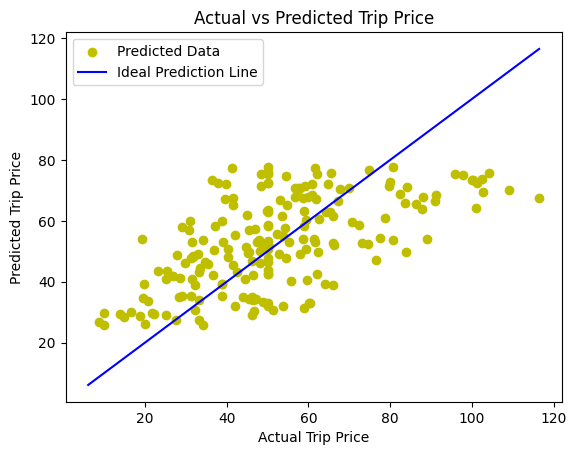

In [ ]:
# Define features and target variable
X = df[['Trip_Distance_km', 'Traffic_Conditions', 'Time_of_Day']]
y = df['Trip_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Scatterplot of actual data with regression line
plt.scatter(y_test, y_pred, color='y', label='Predicted Data')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='blue', label='Ideal Prediction Line')
plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.title('Actual vs Predicted Trip Price')
plt.legend()
plt.show()


1. Single Variable Regression (`Trip_Distance_km` → `Trip_Price`)
- You analyzed how **trip distance alone** affects the trip price.  
- The **correlation coefficient** tells how strongly distance impacts the price.  
- The **regression line** gives a basic trend, but it **ignores other factors** like traffic and time of day.  

Insight:**  
*"Longer trips generally cost more, but price variations due to traffic or time are not considered."*  

Limitation:**  
- Prices may **fluctuate due to traffic and time**, making distance alone an **incomplete predictor**.

---

2. Multiple Variable Regression (`Trip_Distance_km`, `Traffic_Conditions`, `Time_of_Day` → `Trip_Price`)**
- You incorporated **traffic conditions** and **time of day**, making the model more realistic.  
- The model can now account for **higher prices during peak hours** or **longer times due to traffic**.  
- **Better prediction accuracy** (lower RMSE) compared to the single-variable model.  

Insight:**  
*"Trip price depends on multiple factors: not just distance but also traffic and time of travel. Heavy traffic or peak hours can increase the price, even for short trips."*  

Which is More Beneficial?
- **For a quick trend**, single-variable regression is fine.  
- **For better accuracy and real-world pricing predictions**, multiple regression is **more beneficial** since taxi fares depend on multiple factors, not just distance.